In [100]:
#importing relevant libraries
import pandas as pd
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [101]:
#changing the directory
os.chdir(r"C:\Users\HP\OneDrive\Documents\MSC SCHOOL\AI & DA\Data")

In [102]:
#reading the dataset
test = pd.read_csv("msc_testing_dataset.csv")

In [103]:
train = pd.read_csv("msc_training_dataset.csv")

In [104]:
#creating a function to visualize the comparison between actual and predicted values
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [6]:
# head() - It shows the first N rows in the data (by default, N=5).
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [7]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [8]:
# tail() - It shows the last N rows in the data (by default, N=5).
test.tail()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528
998,2,1,2,1,0,1,1,0,0,0,0,6118


In [9]:
train.tail()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135
2999,4,2,1,1,0,0,0,1,1,0,0,8955


In [10]:
# describe() - It shows a descriptive summary of the dataset
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [11]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [12]:
# shape - It shows the total no. of rows and columns of the dataframe
test.shape

(999, 12)

In [14]:
train.shape

(3000, 12)

In [15]:
# info() - Provides basic information about the dataframe.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [17]:
# columns - It shows the name of each column
test.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [18]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [19]:
#isnull() - this shows the number of null values in the dataset
test.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [20]:
train.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [21]:
# Define the features and target variable
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

In [92]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [93]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict the response variable for the test data
y_pred = model.predict(X_test)
y_pred

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [95]:
#printing out the model score 
print(model.score(X_train, y_train))

1.0


In [135]:
# Evaluate the performance of the model
print('MAE Score:', mean_absolute_error(y_test, y_pred))
print('MSE score:', mean_squared_error(y_test, y_pred))

MAE Score: 174.44934934934932
MSE score: 52550.88707707707


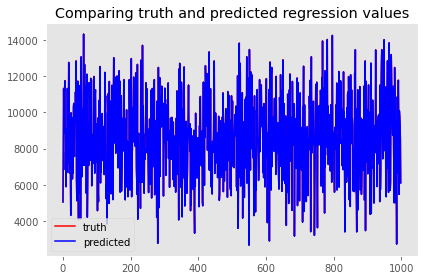

In [97]:
#visualizing the comparison between test and predicted regression values
make_plot(y_test, y_pred)

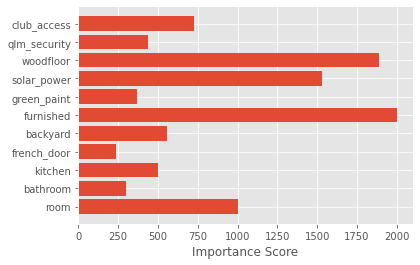

In [98]:
# Get the feature importance scores
feature_importance = model.coef_

# Get feature names
feature_names = X_train.columns

# Create a horizontal bar plot
fig, ax = plt.subplots()
ax.barh(feature_names, feature_importance)

# Set the x-axis label
ax.set_xlabel('Importance Score')

# Show the plot
plt.show()

In [106]:
#concatenate the train dataset columns with feature importances and sort 
imp_scores = zip(feature_importance,  X_train.columns)
sorted(list(imp_scores), reverse=True)

[(1999.9999999999986, 'furnished'),
 (1889.9999999999998, 'woodfloor'),
 (1529.9999999999961, 'solar_power'),
 (1000.0000000000002, 'room'),
 (730.0000000000001, 'club_access'),
 (560.0000000000003, 'backyard'),
 (500.00000000000205, 'kitchen'),
 (440.0000000000012, 'qlm_security'),
 (370.0000000000014, 'green_paint'),
 (299.9999999999994, 'bathroom'),
 (240.00000000000034, 'french_door')]

In [120]:
# Create a random forest regression model object
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [121]:
# Fit the model to the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
# Predict the response variable for the test data
y_predicted = rf_reg.predict(X_test)
y_predicted

array([ 5330.1,  7712. , 11418.5,  8790.2, 11094.3, 11495.3, 11732.1,
        7000.1,  7907.7,  5910.7,  9147.3,  8455.5,  7074.1, 11287.7,
        7339. ,  9490.2,  8966.9, 12785.1,  9863.5,  7030.6,  8878.2,
        7456.6,  7093.5,  4223.8, 10081. ,  7349.3,  7333.4,  9098.9,
        6808.6,  9143.8,  6619.1, 10041.8, 10536.2,  8292. ,  7768.4,
       10201.2,  9251.9, 11074.6,  9383. , 13280.3,  6625.3,  5272.2,
        9868.3,  8951.7, 11589.2,  6149.6,  4364.7, 11433.9,  9623.4,
        5444.8, 11520.4, 10720.1,  4848.9,  7953.9, 13586.3,  9768.4,
        6119.2,  8393.5, 10081.1,  7791. ,  7941.3, 13469. ,  7239.2,
        8470.8, 12526.9,  7140. , 11348.9, 10559.7,  9992. ,  5577.3,
        8175.3, 12118. ,  4163.2,  6227.8,  9570.3,  8697.5,  6879.9,
       11231.8, 10941.9, 10591.4,  8829. ,  7411.3, 11939.2,  8186. ,
       11707.4,  6248.2,  8746.6,  8304.4,  6921.1,  8268. ,  7572.5,
       12111.7, 11659.3,  7913.7,  6619.1, 11087. , 11140. ,  8321.9,
        9191.7,  730

In [123]:
#printing out the model score 
print(rf_reg.score(X_train, y_train))

0.9984449363235307


In [136]:
# Evaluate the performance of the model
print('MAE Score:', mean_absolute_error(y_test, y_predicted))
print('MSE score:', mean_squared_error(y_test, y_predicted))

MAE Score: 174.44934934934932
MSE score: 52550.88707707707


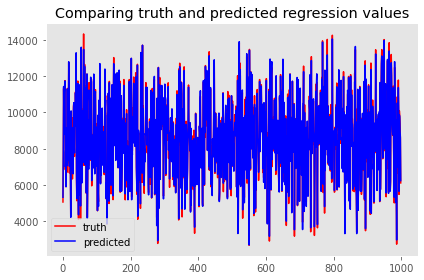

In [137]:
#visualizing the comparison between test and regression values
make_plot(y_test, y_predicted)

In [126]:
#get feature importance of random forest model
rf_reg.feature_importances_

array([0.43245216, 0.00471731, 0.01114917, 0.00883148, 0.01462707,
       0.19731408, 0.00692974, 0.11352989, 0.1757687 , 0.00885522,
       0.02582516])

In [138]:
#viewing the columns of the test dataset
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [139]:
#concatenate the train dataset columns with feature importances and sort 
imp_scores = zip(rf_reg.feature_importances_, train.columns)
sorted(list(imp_scores), reverse=True)

[(0.43245215867741243, 'room'),
 (0.1973140817873771, 'furnished'),
 (0.17576870392824928, 'woodfloor'),
 (0.11352988879682278, 'solar_power'),
 (0.02582516301150733, 'club_access'),
 (0.014627074384342692, 'backyard'),
 (0.011149169968277051, 'kitchen'),
 (0.008855218553140344, 'qlm_security'),
 (0.008831483386509695, 'french_door'),
 (0.006929742670992839, 'green_paint'),
 (0.004717314835368573, 'bathroom')]

In [129]:
rf_importances = rf_reg.feature_importances_
rf_reg.feature_names_in_
ranks_and_features = zip(rf_importances, rf_reg.feature_names_in_)
ranks_and_features = sorted(ranks_and_features,reverse=True)
for x, y in ranks_and_features:
    print(x, y)

0.43245215867741243 room
0.1973140817873771 furnished
0.17576870392824928 woodfloor
0.11352988879682278 solar_power
0.02582516301150733 club_access
0.014627074384342692 backyard
0.011149169968277051 kitchen
0.008855218553140344 qlm_security
0.008831483386509695 french_door
0.006929742670992839 green_paint
0.004717314835368573 bathroom


In [130]:
ranks_and_features

[(0.43245215867741243, 'room'),
 (0.1973140817873771, 'furnished'),
 (0.17576870392824928, 'woodfloor'),
 (0.11352988879682278, 'solar_power'),
 (0.02582516301150733, 'club_access'),
 (0.014627074384342692, 'backyard'),
 (0.011149169968277051, 'kitchen'),
 (0.008855218553140344, 'qlm_security'),
 (0.008831483386509695, 'french_door'),
 (0.006929742670992839, 'green_paint'),
 (0.004717314835368573, 'bathroom')]

In [131]:
keys = [k[1] for k in ranks_and_features ] [::-1]
keys

['bathroom',
 'green_paint',
 'french_door',
 'qlm_security',
 'kitchen',
 'backyard',
 'club_access',
 'solar_power',
 'woodfloor',
 'furnished',
 'room']

In [132]:
values = [k[0] for k in ranks_and_features ][::-1]
values

[0.004717314835368573,
 0.006929742670992839,
 0.008831483386509695,
 0.008855218553140344,
 0.011149169968277051,
 0.014627074384342692,
 0.02582516301150733,
 0.11352988879682278,
 0.17576870392824928,
 0.1973140817873771,
 0.43245215867741243]

<BarContainer object of 11 artists>

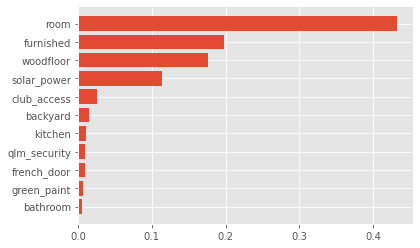

In [133]:
#visualizing the feature importances
plt.barh(keys, values)
